In [1]:
%matplotlib inline

import numpy as np
import numba

import matplotlib.pylab as plt
import matplotlib.cm as cm
from IPython.display import HTML

from tierpsy_features.velocities import get_velocity, get_relative_velocities, animate_velocity, \
_h_segment_position, _h_get_velocity

data = np.load('./data/worm_example.npz')

skeletons = data['skeleton']
dorsal_contours = data['dorsal_contour']
ventral_contours = data['ventral_contour']

delta_frames = 12
fps = 25

signed_speed, angular_velocity, centered_skeleton = get_velocity(skeletons, 'body', delta_frames, fps)

partitions = ['head_tip', 'head', 'neck', 'hips', 'tail', 'tail_tip']
r_radial_velocities, r_angular_velocities = get_relative_velocities(centered_skeleton, partitions, delta_frames, fps)
signed_speed_mid, angular_velocity_mid, centered_skeleton_mid = get_velocity(skeletons, 'midbody', delta_frames, fps)


In [2]:
if False:
    #show that the centered skeletons are indeed centered to the midbody
    coords_c, orientation_v_c = _h_segment_position(centered_skeleton, partition = 'midbody')
    orientation_c = np.arctan2(orientation_v_c[:, 0], orientation_v_c[:, 1])

    xlim = (3500, 4500)
    figsize = (15, 2)
    plt.figure(figsize = figsize)
    plt.plot(coords_c)

    plt.figure(figsize = figsize)
    plt.plot(orientation_v_c, '.')

    plt.figure(figsize = figsize)
    plt.plot(orientation_c, '.')

    print(np.nanmax(np.abs(coords_c)))
    print(np.nanmax(np.abs(orientation_c)))

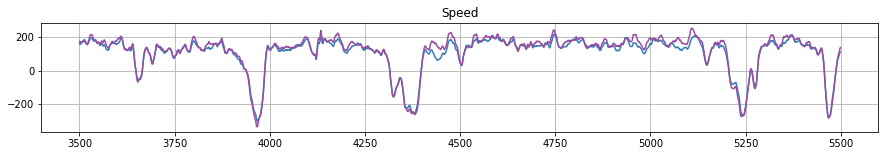

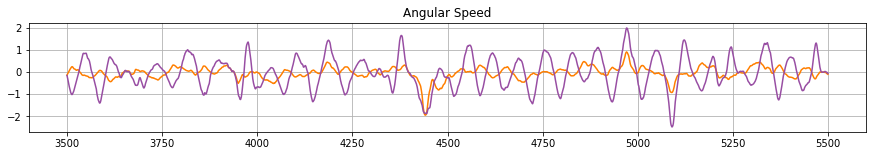

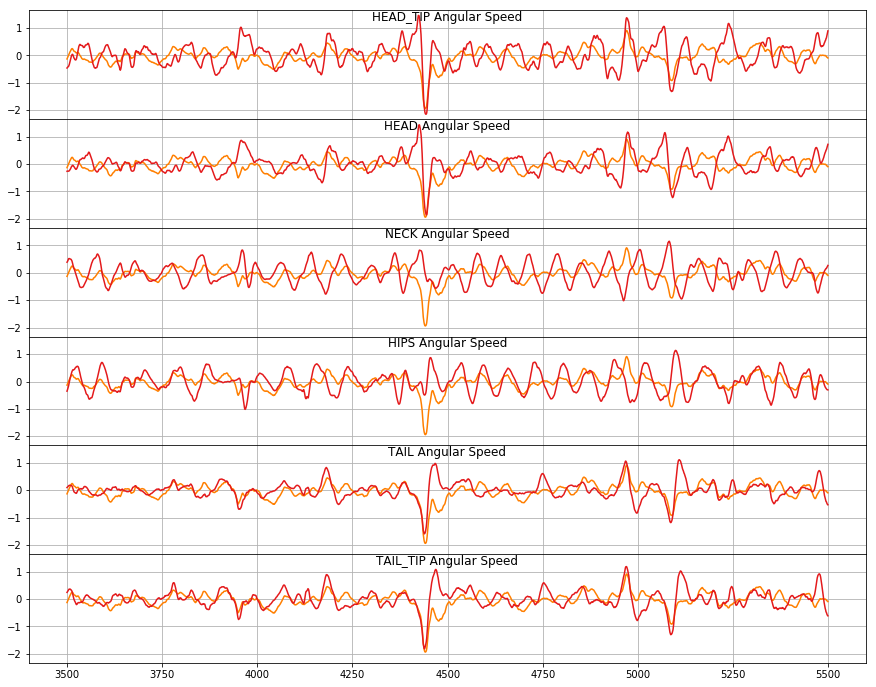

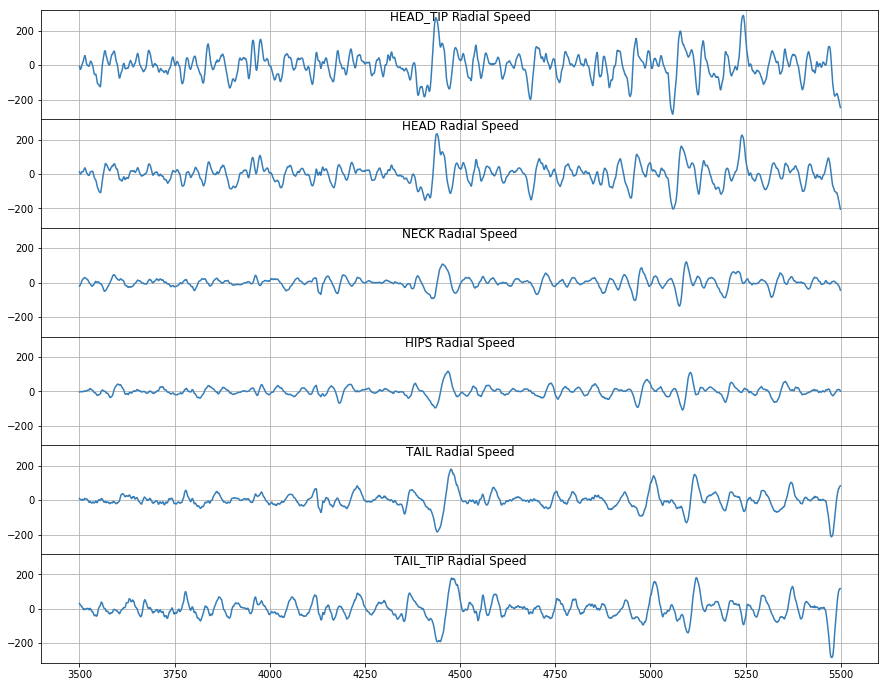

In [3]:
#d_r = (283000, 285000)#(0, angular_velocity.size)#(3500, 4500)#(0, 3000)#(83000, 85000)#
d_r = (3500, 5500)
xx = np.arange(d_r[0], d_r[1])

figsize = (15, 2)
plt.figure(figsize = figsize)
plt.plot(xx, signed_speed[d_r[0]:d_r[1]], color=cm.Set1.colors[1])

plt.plot(xx, signed_speed_mid[d_r[0]:d_r[1]], color=cm.Set1.colors[3])

plt.title('Speed')
plt.grid('on')

plt.figure(figsize = figsize)
plt.plot(xx, angular_velocity[d_r[0]:d_r[1]], color=cm.Set1.colors[4])

plt.plot(xx, angular_velocity_mid[d_r[0]:d_r[1]], color=cm.Set1.colors[3])

plt.title('Angular Speed')
plt.grid('on')

dat2plot = [
    (r_angular_velocities, 'Angular Speed'), 
    (r_radial_velocities, 'Radial Speed')
]
for ii, (dat, tt) in enumerate(dat2plot):
    f, axs = plt.subplots(len(dat), sharex=True, sharey=True, figsize = (15, 12))
    for ax, p in zip(axs, dat):
        if ii == 0:
            ax.plot(xx, angular_velocity[d_r[0]:d_r[1]], color=cm.Set1.colors[4])
            
        ax.plot(xx, dat[p][d_r[0]:d_r[1]], color=cm.Set1.colors[ii])
        ax.set_title(p.upper() + ' ' + tt, y=0.85)
        
        ax.grid('on')
    
    
    f.subplots_adjust(hspace=0)


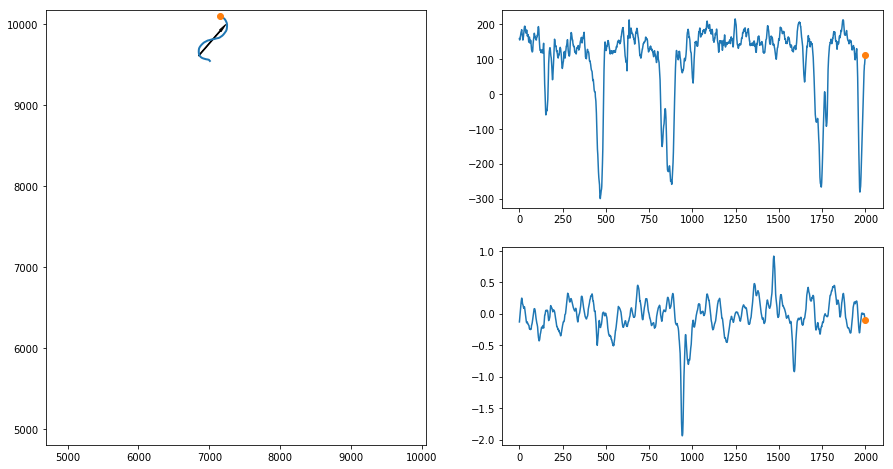

In [4]:
ini_t = d_r[0]
fin_t = d_r[1]

coords, orientation_v = _h_segment_position(skeletons, partition = 'body')

skel_a = skeletons[ini_t:fin_t]
arrow_size = orientation_v[ini_t:fin_t]
ini_arrow = coords[ini_t:fin_t] - arrow_size/2

ang_v = angular_velocity[ini_t:fin_t]
speed_v = signed_speed[ini_t:fin_t]


anim = animate_velocity(skel_a, ini_arrow, arrow_size, speed_v, ang_v)
HTML(anim.to_html5_video())

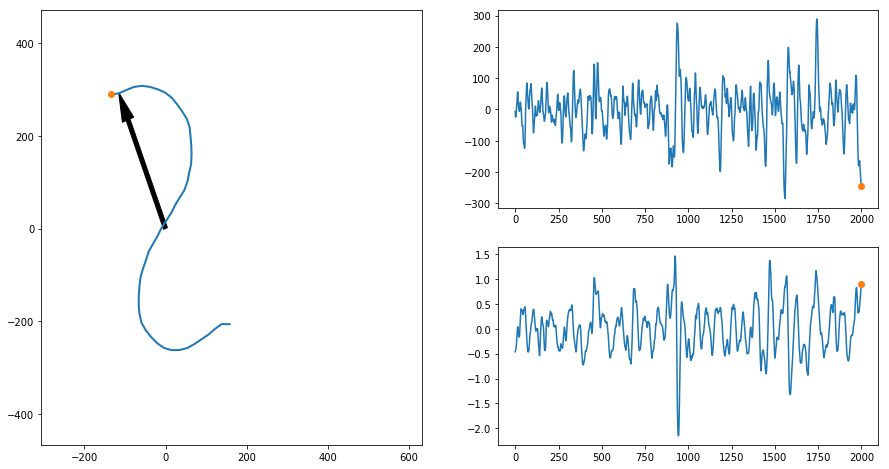

In [5]:
partition = 'head_tip'

segment_coords, _ = _h_segment_position(centered_skeleton, partition = partition)

skel_a = centered_skeleton[ini_t:fin_t]
arrow_size = segment_coords[ini_t:fin_t]
ini_arrow = np.zeros_like(arrow_size)

ang_v = r_angular_velocities[partition][ini_t:fin_t]
speed_v = r_radial_velocities[partition][ini_t:fin_t]

anim = animate_velocity(skel_a, ini_arrow, arrow_size, speed_v, ang_v)
HTML(anim.to_html5_video())


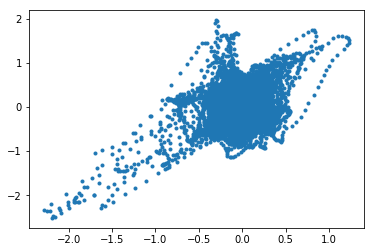

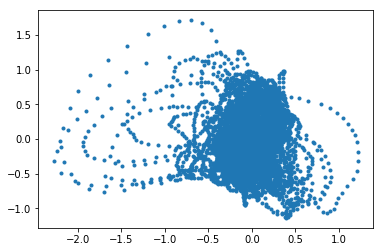

In [10]:
plt.figure()
plt.plot(angular_velocity, r_angular_velocities['head_tip'], '.')

plt.figure()
plt.plot(angular_velocity, r_angular_velocities['neck'], '.')



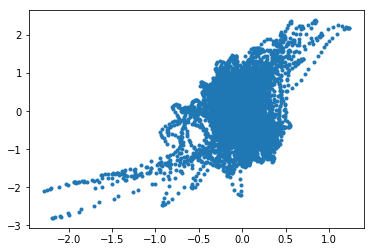

In [7]:
plt.figure()
plt.plot(angular_velocity, angular_velocity_mid, '.')